In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express
import plotly.graph_objects as go

In [ ]:
data=pd.read_csv('/content/hcvdat0.csv')

In [ ]:
data.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [ ]:
arr=data['Category']
t=[]
for i in arr:
  t.append(str(i).split('=')[1])
data['Category'].replace({'0=Blood Donor':0,'0s=suspect Blood Donor':1,'1=Hepatitis':2, '2=Fibrosis':3,'3=Cirrhosis':4},inplace=True)

In [ ]:
data['category']=t

As you can see in the data that there are some NA values so instead of removing them completely we will fill them with the nearest values .

In [ ]:
data.interpolate(method='linear',limit_direction='forward',inplace=True)

In [ ]:
data.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,category
610,611,4,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,Cirrhosis
611,612,4,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,Cirrhosis
612,613,4,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,Cirrhosis
613,614,4,46,f,33.0,87.3,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,Cirrhosis
614,615,4,59,f,36.0,87.3,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0,Cirrhosis


We are gonna seperate the people which are the suspected blood donors with the real blood donors

In [ ]:
bd=pd.DataFrame()
bd=data[data['Category'].isin([0,1])]

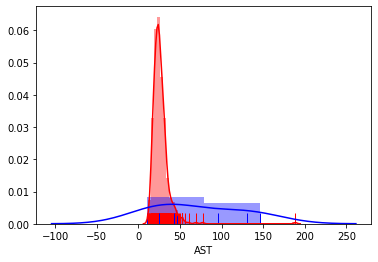

In [ ]:
sns.distplot(bd[bd['Category']==0]['AST'],color='red',label='Blood Donors',rug=True);
sns.distplot(data[data['Category']==1]['AST'],color='blue',label='Suspected Blood Donors',rug=True);



What does it mean when your AST level is high?


High levels of AST in the blood may indicate hepatitis, cirrhosis, mononucleosis, or other liver diseases. High AST levels can also indicate heart problems or pancreatitis. If your results are not in the normal range, it doesn't necessarily mean that you have a medical condition needing treatment.

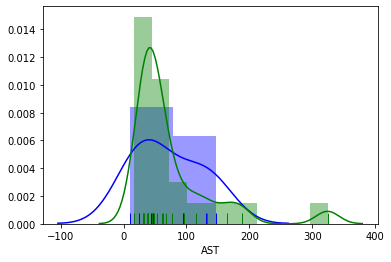

In [ ]:
sns.distplot(data[data['Category']==1]['AST'],color='blue',label='Suspected Blood Donors',rug=True);
sns.distplot(data[data['Category']==2]['AST'],color='green',label='Hepatitis',rug=True);



In [ ]:
# So we can see that the AST level in those with the disiese is pretty higher than the ones who are suspected or are the ones with no disease at all.

In [ ]:
colours=['red','blue','green','yellow','violet']
plotly.express.scatter_3d(data_frame=data,x='CREA',y='GGT',z='Age',color=data['category'])

In [ ]:
#Now we head onto some of the basic visualizations that are there!!

In [ ]:
b=go.Bar(x=['Male','Female'],y=[list(data['Sex'].values).count('m'),list(data['Sex'].values).count('f')])
go.Figure(data=b)

# **Making the Cluster For the Data**

In [ ]:
# We are gonna be using the K means method

In [ ]:
X=data.iloc[:, [2,10]].values

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
#this loop will fit the k-means algorithm to our data and 
#second we will compute the within cluster sum of squares and #appended to our wcss list.
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
     kmeans.fit(X)
     #kmeans algorithm fits to the X dataset
     wcss.append(kmeans.inertia_)  

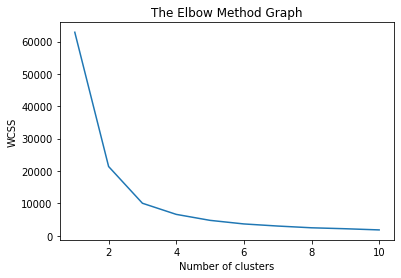

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

In [ ]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

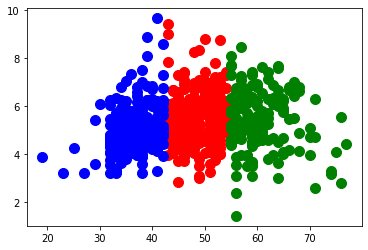

In [ ]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')

In this method we were just using 2 features for the clustering .But lets consider 3 of the features now and try to predict on the basis of that and also visualize it.

# **Clustering With 3 Features and its Visualization**

In [ ]:
X=data.iloc[:,[2,5,10]].values

In [ ]:
w=[]
for i in range(1,11):
  kmean=KMeans(n_clusters=i)
  kmean.fit(X)
  w.append(kmean.inertia_)

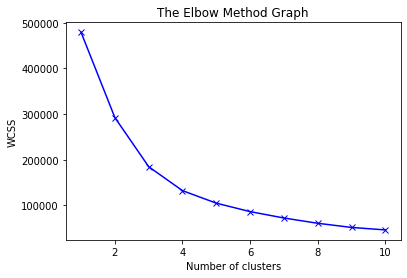

In [ ]:
plt.plot(range(1,11),w,'bx-')
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmean=KMeans(n_clusters=5)
kmean.fit(X)
y=kmean.predict(X)


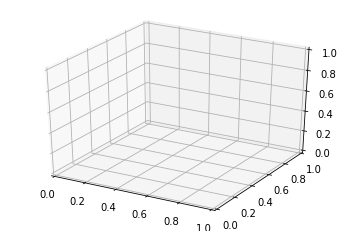

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

In [ ]:
plotly.express.scatter_3d(data_frame=data,x='ALP',y='CHOL',z='Age',color=y)

From this diagram we can see that we actually dont need 5 classes that was shown in the data that was becuase our data showed us that the class 0 was actually divided in 2 classes which we did on our own and this shows to us that the people have being suspected to be having some problems are whys o difficult to chase out


# **Now doing the clustering on the basis of all the fetures but Visulizing the same figure as before**

In [ ]:
X=data.iloc[:,[2,4,5,7,6,8,9,10,11,12,13]].values

In [ ]:
w=[]
for i in range(1,11):
  kmean=KMeans(n_clusters=i)
  kmean.fit(X)
  w.append(kmean.inertia_)

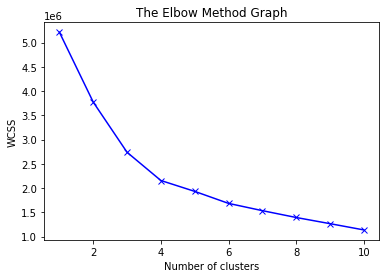

In [ ]:
plt.plot(range(1,11),w,'bx-')
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmean=KMeans(n_clusters=5)
kmean.fit(X)
y=kmean.predict(X)

In [ ]:
plotly.express.scatter_3d(data_frame=data,x='ALP',y='ALB',z='Age',color=y)